In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [4]:
font_path = '../resData/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [5]:
df = pd.read_excel("../resData/시도별_전출입_인구수.xlsx", engine='openpyxl', header=0)
df = df.fillna(method='ffill')
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({"전입지별": "전입지"}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

C:\Users\kosmo\AppData\Local\Temp\ipykernel_1932\2084940065.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [6]:
# 연도를 2010~2017까지로 설정
col_years = list(map(str,range(2010,2018)))
col_years

['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

In [8]:
# 연도를 적용하여 각 4개의 도를 추출
df4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df4

,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,16042,15818,15191,14420,14456,15113,14236,12464
강원도,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,16429,15974,14765,14187,14591,14598,13065,12426


In [16]:
df4['합계'] = df4.sum(axis=1)
df_total = df4[['합계']].sort_values(by='합계',ascending=True)
df_total

,합계
전입지,
전라남도,464140
경상북도,470960
강원도,702924
충청남도,718132


Text(0.5, 0, '이동 인구 수')

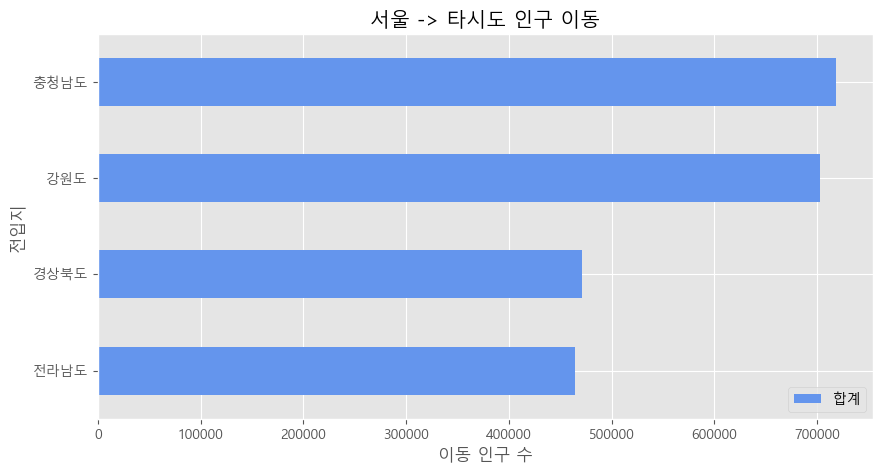

In [17]:
# 그래프 스타일 설정
plt.style.use('ggplot')

# 수평 형태의 막대 그래프(kind='barh') 생성.
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10,5))

# 라벨 설정
plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')